# NumPy

計算社会科学の研究は、テキスト、画像、ビデオや数値測定結果など幅広いデータセットとソースを扱っています。

形式に違いがあるにも関わらず、基本的に全てのデータは数値の配列として扱うのに適しています。

- テキストデータは文字のシーケンスであり、それぞれの文字には数値の表現があります（通常はUnicode）。テキスト処理や自然言語処理のために、テキストデータは数値の配列として表現されることがあります。一般的な手法には、文字を数値にエンコードする方法（例：ASCII、UTF-8）、単語や文字の出現頻度を数える方法、単語の埋め込み（Word2Vec、GloVe）などがあります。
- 画像は、各ピクセルに対して数値の輝度や色情報が割り当てられています。カラー画像の場合、各ピクセルはRGB（赤、緑、青）の値で表され、グレースケール画像の場合は単一の輝度値で表されます。

![](https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/images/digit.gif)

どのようなデータであっても、それらを分析可能にする最初のステップは、数値の配列に変換することです。

このため、数値配列の効率的な格納と操作は、データ分析にとって欠かせない要素です。

```NumPy```は、多次元配列や行列演算を効率的に処理する機能を提供し、科学技術計算やデータ解析に広く利用されています。

In [1]:
import numpy as np
print(np.__version__)

1.23.5


## NumPy配列の作成

### Pythonリストから作る配列

```np.array```を使って、PythonリストからNumPy配列（```ndarray```）を作成します。

```{margin}
NumPy配列とPythonの組み込みリストと似ていますが、NumPy配列はより効率的な格納とデータ操作を提供しています。
```

In [2]:
np.array([1, 2, 3, 4, 5, 6])

array([1, 2, 3, 4, 5, 6])

Pythonリストとは異なり、NumPy配列の要素は全て同じ型という制約がります。作成する際、型が一致しない場合、可能であればNumPyは自動的に調整してくれます。

In [3]:
np.array([1, 2, 3.14, 4, 5, 6]) # upcasting: all elements are converted to float

array([1.  , 2.  , 3.14, 4.  , 5.  , 6.  ])

```dtype```キーワードで配列のデータ型を明示的に設定できます。

In [4]:
np.array([1, 2, 3, 4, 5, 6],dtype='float32') # specify data type

array([1., 2., 3., 4., 5., 6.], dtype=float32)

### 配列の構築

```NumPy```の組み込み関数で配列を作成できます。

In [5]:
np.zeros(10, dtype=int) # create an array of 10 zeros

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
np.ones((3, 5), dtype=float) # create a 3x5 array of floating-point ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [7]:
np.full((3, 5), 3.14) # create a 3x5 array filled with 3.14

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [8]:
np.arange(0, 20, 2) # create an array filled with a linear sequence

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [9]:
np.linspace(0, 1, 5) # create an array of five values evenly spaced between 0 and 1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [10]:
np.random.random((3, 3)) # create a 3x3 array of uniformly distributed random values between 0 and 1

array([[0.03972075, 0.01313721, 0.11652585],
       [0.73118765, 0.56261878, 0.77577024],
       [0.62545668, 0.9852187 , 0.8515409 ]])

In [11]:
np.random.normal(0, 1, (3, 3)) # create a 3x3 array of normally distributed random values with mean 0 and standard deviation 1

array([[-0.29763031,  1.28435389, -0.03988175],
       [ 0.19294575,  0.98395715, -0.31604881],
       [-0.10334999,  0.43267467, -0.57742993]])

In [12]:
np.random.randint(0, 10, (3, 3)) # create a 3x3 array of random integers in the interval [0, 10)

array([[5, 2, 1],
       [0, 5, 4],
       [5, 1, 7]])

In [13]:
np.eye(3) # create a 3x3 identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

```{note}
配列作成方法の一覧は、[公式チュートリアル](https://numpy.org/doc/stable/reference/routines.array-creation.html)を参照してください。
```

## NumPy配列の属性

In [14]:
import numpy as np
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(10, size=6) # one-dimensional array
x2 = np.random.randint(10, size=(3, 4)) # two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5)) # three-dimensional array

NumPy配列には、ndim(次元数)、shape(各次元のサイズ)、size(配列の合計サイズ)、dtype(配列のデータ型)などの属性を持ちます。

In [15]:
print("x3 ndim: ", x3.ndim) # number of dimensions
print("x3 shape:", x3.shape) # the size of each dimension
print("x3 size: ", x3.size) # total size of the array
print("dtype:", x3.dtype) # data type of the array

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64


## 配列のインデクス

1次元配列では、Pythonリストと同様に、$i$番目($0$から)の値にアクセスできます。

In [16]:
x1

array([5, 0, 3, 3, 7, 9])

In [17]:
x1[1]

0

多次元配列では、カンマで区切ったインデクスで要素にアクセスします。

In [18]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [19]:
x2[1,1]

6

In [20]:
x2[1,-1]

8

インデクスを指定し、要素の値を変更するもできます。

In [21]:
x2[1,-1]=12

In [22]:
x2

array([[ 3,  5,  2,  4],
       [ 7,  6,  8, 12],
       [ 1,  6,  7,  7]])

## NumPyの応用例:線型回帰モデル

$n$個のデータ$(x_1,y_1),...(x_n,y_n)$が観測され、各$y_i$が
$$
y_i=\alpha +\beta x_i+u_i,\ i=1,...,n
$$
が得られます。

### 最小二乗法

最小二乗法の目標は、与えられたデータセットに対して予測された値（モデルの出力）と実際の値（データセットの出力）の差を最小化することである。

$$
h(\alpha,\beta)= \sum_{i=1}^n (y_i-\alpha-\beta x_i)^2
$$


$E[h(\alpha,\beta)]=0$から,母集団における$\alpha$と$\beta$を求めるが、これはあくまでも母集団の概念である。実際に持っているのは母集団に対応する標本であって、母集団そのもののは手に入りません。

$$
\frac{1}{n} \sum_{i=1}^n (y_i-\hat{\alpha}-\hat{\beta}x_i)=0
$$

データから得られる推定値を$\hat{\alpha}, \hat{\beta}$で定義する。

$$
\frac{1}{n} \sum_{i=1}^n (y_i-\hat{\alpha}-\hat{\beta}x_i)
\\
=\frac{1}{n} \sum_{i=1}^n (y_i)-\frac{1}{n} \sum_{i=1}^n \hat{\alpha}- \frac{1}{n} \sum_{i=1}^n \hat{\beta}x_i 
\\
=\frac{1}{n} \sum_{i=1}^n (y_i)- \hat{\alpha}- \hat{\beta} \frac{1}{n} \sum_{i=1}^n x_i
\\
= \bar{y} - \hat{\alpha} - \hat{\beta}\bar{x}
$$

ここで、$\bar{y}$は標本平均と呼ぶ。この式を切片について書き直すと、

$$\hat{\alpha}　= \bar{y}  - \hat{\beta}\bar{x}$$

この式を　
$$
\frac{1}{n} \sum_{i=1}^n x_i(y_i-\hat{\alpha}-\hat{\beta}x_i)=0 (条件付き期待値ゼロ仮定　E(u|x)=0 より)
$$
に代入すると

$$
\sum_{i=1}^n x_i(y_i-(\bar{y}  - \hat{\beta}\bar{x})-\hat{\beta}x_i)=0
$$

$$
\sum_{i=1}^n x_i(y_i-\bar{y})=\hat{\beta} \sum_{i=1}^n x_i(\bar{x}-x_i)
$$

ここで、
$$
\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y}) = \sum_{i=1}^n x_i(y_i-\bar{y}) = \sum_{i=1}^n y_i(x_i-\bar{x})
$$

$$
\sum_{i=1}^n (x_i-\bar{x})^2 = \sum_{i=1}^n x_i^2-n(\bar{x})^2
$$
のため

この式から$\hat{\beta}$を解くと、
$$

\hat{\beta}=\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}=\frac{標本共分散(x_i,y_i)}{標本分散(x_i)}

$$
そして、$\hat{\alpha}$も得られる
$$

\hat{\alpha}=\hat{y}-\hat{\beta}\bar{x}

$$

任意の推定値$\hat{\alpha},\hat{\beta}$に関して、$i$に関する当てはめる値(fitted value)を
$$

\hat{y_i}=\hat{\alpha} +\hat{\beta} x_i

$$
と定義する。

回帰直線と観測値との差
$$

\hat{u_i}=y_i-\hat{y_i}

$$

を残差(residual)といいます。

残差の二乗の和をとったもの
$$

RSS=\sum_{i=1}^n \hat{u_i}^2

$$
を残差平方和(residual sum of squares, RSS)といいます。

ここで、残差平方和を最小にするような$\hat{\alpha}$と$\hat{\beta}$を選びます。

In [23]:
import numpy as np

# サンプルデータ
# パラメータ
beta_0 = 2.5  # 切片
beta_1 = 0.8  # 傾き
n = 100  # データ数

# 説明変数を一様分布から生成
x = np.random.uniform(low=0, high=10, size=n)

# ノイズ項を標準正規分布から生成
epsilon = np.random.normal(loc=0, scale=1, size=n)

# 目的変数を生成
y = beta_0 + beta_1 * x + epsilon

In [24]:
# パラメータの推定
x_mean = np.mean(x)
y_mean = np.mean(y)

# β₁の推定
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta = numerator / denominator
print("beta: ", beta)
# β₀の推定
alpha = y_mean - beta * x_mean

print("alpha: ", alpha)

beta:  0.7671310948779998
alpha:  2.7675436714282973


In [25]:
# 予測値の計算
y_pred = alpha + beta * x

# 残差の計算
residuals = y - y_pred

# 残差の合計の確認
residual_sum = np.sum(residuals)

print("残差の合計:", residual_sum)

残差の合計: -7.72715225139109e-14


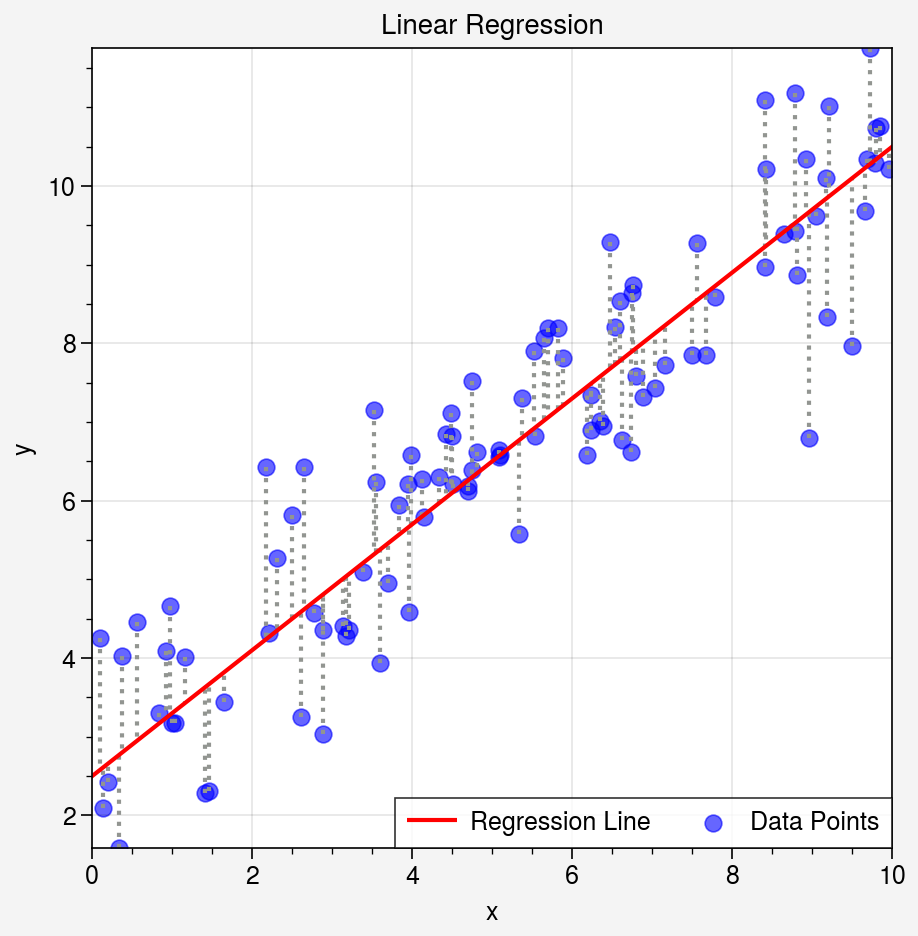

In [26]:
{
    "tags": [
        "hide-cell"
    ]
}
import numpy as np
import proplot as plt


# Creating a figure and axes
fig, ax = plt.subplots(refwidth=4)

# Scatter plot of the data points
ax.scatter(x, y, color='blue', label='Data Points',alpha=0.6)

# Regression line
x_line = np.linspace(0, 10, 100)
y_line = beta_0 + beta_1 * x_line
ax.plot(x_line, y_line, color='red', label='Regression Line')

# Vertical lines and residuals
for i in range(n):
    x_i = x[i]
    y_i = y[i]
    y_pred_i = beta_0 + beta_1 * x_i
    ax.vlines(x_i, y_i, y_pred_i, color='gray', linestyle='dotted')

# Plot settings
ax.format(xlabel='x', ylabel='y', title='Linear Regression')
ax.legend(loc="lower right")

# Display the plot
plt.show()